In [6]:
#Importing and downloading Natural Langauge Processing tool kits 
import nltk
from nltk import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

#Importing pandas
import pandas as pd

#Importing webscraping modules and libraries
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode

#Others
import string

#Ignore Warnings
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [55]:
df1 = pd.read_csv("Smart_Watch_Review.csv")

In [56]:
df1.head()

,Unnamed: 0,Review,Rating
0,0,I have been using Halo for a couple of months ...,4
1,1,"All-in-all, very satisfied. Most results have ...",5
2,2,I was offered an invite to participate in the ...,1
3,3,Here is the TLDR: I think this is a potent too...,4
4,4,5/30/22From start to finish I will continue to...,4


In [57]:
df1['Review'].iloc[2]

'I was offered an invite to participate in the early use of this product. I got the product, but was then slightly put off by what I was reading and learning from other early trial people, and now that I\'ve tried it for a couple of days, I can see where I would have been better off not trying this product.=== Updated 25 Feb 2021 ===Received a happy email that my Halo subscription trial (free) has been extended to September 13, 2021!Unfortunately, I returned the Halo band with substantial disappointment, but I had been assured by  Amazon support that the sub would cancel automatically when I returned it.So another F. Can we go negative on stars? Really disappointed, though I would have been livid if I had been charged for it, so I guess the email leading me to check beforehand, while a waste of time, saves me more frustration later.=== Updated 26 Jan 2021 ===Shipped back to Amazon on 25 Jan.Given the quality of the hardware, I would take a look at whatever they come up with next, but A

In [58]:

df1.columns = df1.columns.str.strip()     
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace(r"[^a-zA-Z\d\_]+", "")    
df1.columns = df1.columns.str.replace('\W', '', regex=True)



In [59]:
pattern = r"\&\#[0-9]+\;"

df1["preprocessed"] = df1["Review"].str.replace(pat=pattern, repl="", regex=True)

print(df1["preprocessed"].iloc[2])

I was offered an invite to participate in the early use of this product. I got the product, but was then slightly put off by what I was reading and learning from other early trial people, and now that I've tried it for a couple of days, I can see where I would have been better off not trying this product.=== Updated 25 Feb 2021 ===Received a happy email that my Halo subscription trial (free) has been extended to September 13, 2021!Unfortunately, I returned the Halo band with substantial disappointment, but I had been assured by  Amazon support that the sub would cancel automatically when I returned it.So another F. Can we go negative on stars? Really disappointed, though I would have been livid if I had been charged for it, so I guess the email leading me to check beforehand, while a waste of time, saves me more frustration later.=== Updated 26 Jan 2021 ===Shipped back to Amazon on 25 Jan.Given the quality of the hardware, I would take a look at whatever they come up with next, but Ama

In [52]:
df1.head()

,Review,Rating,preprocessed
0,I have been using Halo for a couple of months ...,4,I have been using Halo for a couple of months ...
1,"All-in-all, very satisfied. Most results have ...",5,"All-in-all, very satisfied. Most results have ..."
2,I was offered an invite to participate in the ...,1,I was offered an invite to participate in the ...
3,Here is the TLDR: I think this is a potent too...,4,Here is the TLDR: I think this is a potent too...
4,5/30/22From start to finish I will continue to...,4,5/30/22From start to finish I will continue to...


In [61]:
df1["preprocessed"] = df1["preprocessed"].astype(str)

In [62]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt","averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df1["preprocessed"] = df1["preprocessed"].apply(lambda row: lemmatize_doc(row))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/uddhavzambare/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uddhavzambare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/uddhavzambare/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/uddhavzambare/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


CPU times: user 18.6 s, sys: 543 ms, total: 19.1 s
Wall time: 19.2 s


In [63]:
#removing Accent
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df1["preprocessed"] = df1["preprocessed"].apply(remove_accent)

print(df1["preprocessed"].iloc[0])

I have be use Halo for a couple of month now and there be so much to like but it feel a bit rough around the edge when compare to other more refined product from Fitbit or Samsung I have have a number of smart watch and fitness band over the year I have be use a high end smart watch for the last year The problem with that be that I can not wear my good analog watch without look like an idiot Even the Fitbit fitness band have a large digital display which look somewhat stupid when you have a big dive watch on the other wrist So I want something small and really understated Amazon have invite me to try Halo pay for it but at a discount and it look like it might fit the bill For the most part it do Here be the highlight : -Hardware : Not have a screen be strange at first but I have learn to really like it With all of our device it be one less thing to distract me The device itself be lightweight aluminum that fit the wrist nicely It have one button for reset the device if ever need A doub

In [64]:
#removing punctuations
pattern = r"[^\w\s]"

df1["preprocessed"] = df1["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df1["preprocessed"].iloc[0])

I have be use Halo for a couple of month now and there be so much to like but it feel a bit rough around the edge when compare to other more refined product from Fitbit or Samsung I have have a number of smart watch and fitness band over the year I have be use a high end smart watch for the last year The problem with that be that I can not wear my good analog watch without look like an idiot Even the Fitbit fitness band have a large digital display which look somewhat stupid when you have a big dive watch on the other wrist So I want something small and really understated Amazon have invite me to try Halo pay for it but at a discount and it look like it might fit the bill For the most part it do Here be the highlight    Hardware   Not have a screen be strange at first but I have learn to really like it With all of our device it be one less thing to distract me The device itself be lightweight aluminum that fit the wrist nicely It have one button for reset the device if ever need A doub

In [65]:
# converting to lower case
df1["preprocessed"] = df1["preprocessed"].str.lower()

print(df1["preprocessed"].iloc[0])

i have be use halo for a couple of month now and there be so much to like but it feel a bit rough around the edge when compare to other more refined product from fitbit or samsung i have have a number of smart watch and fitness band over the year i have be use a high end smart watch for the last year the problem with that be that i can not wear my good analog watch without look like an idiot even the fitbit fitness band have a large digital display which look somewhat stupid when you have a big dive watch on the other wrist so i want something small and really understated amazon have invite me to try halo pay for it but at a discount and it look like it might fit the bill for the most part it do here be the highlight    hardware   not have a screen be strange at first but i have learn to really like it with all of our device it be one less thing to distract me the device itself be lightweight aluminum that fit the wrist nicely it have one button for reset the device if ever need a doub

In [66]:
#removing stop_words 

from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df1["preprocessed"] = df1["preprocessed"].apply(remove_stop_words)

print(df1["preprocessed"].iloc[0])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [67]:
#removing extra space

pattern = r"[\s]+"

df1["preprocessed"] = df1["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df1["preprocessed"].iloc[0])

use halo couple month much like feel bit rough around edge compare refined product fitbit samsung number smart watch fitness band year use high end smart watch last year problem wear good analog watch without look like idiot even fitbit fitness band large digital display look somewhat stupid big dive watch wrist want something small really understated amazon invite try halo pay discount look like might fit bill part highlight hardware screen strange first learn really like device one less thing distract device lightweight aluminum fit wrist nicely one button reset device ever need double tap resync app band connect bit without use typical sensor bottom measure heart rate get one silver mesh strap really like opt buy silicone strap halo waterproof like shower without remove mesh strap stay wet long liking amazon work silicone strap design pretty ugly work comfortable device win mind wear day everyday software one would expect company like amazon software experience thing shine still inc

In [68]:
#tokenization

corpora = df1["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[0])

['use', 'halo', 'couple', 'month', 'much', 'like', 'feel', 'bit', 'rough', 'around', 'edge', 'compare', 'refined', 'product', 'fitbit', 'samsung', 'number', 'smart', 'watch', 'fitness', 'band', 'year', 'use', 'high', 'end', 'smart', 'watch', 'last', 'year', 'problem', 'wear', 'good', 'analog', 'watch', 'without', 'look', 'like', 'idiot', 'even', 'fitbit', 'fitness', 'band', 'large', 'digital', 'display', 'look', 'somewhat', 'stupid', 'big', 'dive', 'watch', 'wrist', 'want', 'something', 'small', 'really', 'understated', 'amazon', 'invite', 'try', 'halo', 'pay', 'discount', 'look', 'like', 'might', 'fit', 'bill', 'part', 'highlight', 'hardware', 'screen', 'strange', 'first', 'learn', 'really', 'like', 'device', 'one', 'less', 'thing', 'distract', 'device', 'lightweight', 'aluminum', 'fit', 'wrist', 'nicely', 'one', 'button', 'reset', 'device', 'ever', 'need', 'double', 'tap', 'resync', 'app', 'band', 'connect', 'bit', 'without', 'use', 'typical', 'sensor', 'bottom', 'measure', 'heart', 

## Phrase Modelling

In [69]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [70]:
#unigrams

uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['predominantly', 'sabe', 'spectrum', 'functionimo', 'upthe', 'sedentariness', 'dub', 'motivate', 'lowered', 'bps', 'detrimental', 'buzzer', 'rectangular', 'hungry', 'pricey', 'rolling', 'versai', 'utterly', 'still', 'tge', 'blue', 'act', 'predates', 'materials', 'edge', 'legume', 'read', 'tanto', 'bp', 'pair', 'medico', 'comfortably', 'superficial', 'downgrade', 'second', 'goals', 'motivatepulse', 'vo2', 'morbidly', 'dread', 'abuse', 'revision', 'instrucciones', 'guidance', '166', 'forcing', '1000', 'meaures', 'assesssment', 'pig']


In [71]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: 000
ID: 1, Token: 03
ID: 2, Token: 05
ID: 3, Token: 15
ID: 4, Token: 150
ID: 5, Token: 2
ID: 6, Token: 20
ID: 7, Token: 21
ID: 8, Token: 3
ID: 9, Token: 4


In [72]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: 000, Frequency: 2
Word: 03, Frequency: 1
Word: 05, Frequency: 1
Word: 15, Frequency: 1
Word: 150, Frequency: 1
Word: 2, Frequency: 1
Word: 20, Frequency: 1
Word: 21, Frequency: 1
Word: 3, Frequency: 1
Word: 4, Frequency: 1
Word: 50, Frequency: 3
Word: 51, Frequency: 1
Word: 60, Frequency: 1
Word: 71, Frequency: 1
Word: 99, Frequency: 1
Word: able, Frequency: 1
Word: absolute, Frequency: 1
Word: absolutely, Frequency: 1
Word: account, Frequency: 1
Word: accumulate, Frequency: 1
Word: accurate, Frequency: 2
Word: achieve, Frequency: 1
Word: active, Frequency: 2
Word: activity, Frequency: 7
Word: actual, Frequency: 1
Word: actually, Frequency: 1
Word: add, Frequency: 5
Word: added, Frequency: 1
Word: addition, Frequency: 2
Word: additional, Frequency: 1
Word: additionally, Frequency: 1
Word: afformentioned, Frequency: 1
Word: ago, Frequency: 1
Word: alexa, Frequency: 2
Word: allow, Frequency: 2
Word: almost, Frequency: 1
Word: also, Frequency: 2
Word: aluminum, Frequency: 1
Word: al

In [73]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: 000, Weight: 0.059
Word: 03, Weight: 0.052
Word: 05, Weight: 0.045
Word: 15, Weight: 0.024
Word: 150, Weight: 0.024
Word: 2, Weight: 0.013
Word: 20, Weight: 0.023
Word: 21, Weight: 0.031
Word: 3, Weight: 0.014
Word: 4, Weight: 0.016
Word: 50, Weight: 0.079
Word: 51, Weight: 0.043
Word: 60, Weight: 0.030
Word: 71, Weight: 0.045
Word: 99, Weight: 0.026
Word: able, Weight: 0.017
Word: absolute, Weight: 0.034
Word: absolutely, Weight: 0.023
Word: account, Weight: 0.026
Word: accumulate, Weight: 0.039
Word: accurate, Weight: 0.021
Word: achieve, Weight: 0.032
Word: active, Weight: 0.039
Word: activity, Weight: 0.073
Word: actual, Weight: 0.023
Word: actually, Weight: 0.016
Word: add, Weight: 0.097
Word: added, Weight: 0.033
Word: addition, Weight: 0.056
Word: additional, Weight: 0.028
Word: additionally, Weight: 0.033
Word: afformentioned, Weight: 0.052
Word: ago, Weight: 0.023
Word: alexa, Weight: 0.060
Word: allow, Weight: 0.045
Word: almost, Weight: 0.019
Word: also, Weight: 0.021


In [76]:
#Word Embedding for Feature Engineering

import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size = feature_size, window = context_size,min_count = min_word,iter =50,seed = 42)



In [77]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
use,-3.295990,-3.271875,0.891680,-1.469160,-0.609090,2.050554,-2.033142,0.200767,-0.941945,-2.030497,...,0.807324,-1.915200,2.273438,0.098681,-1.226354,0.513042,0.656025,-1.370913,-0.341699,-1.947944
halo,-0.512616,-0.615938,2.291809,-0.808305,-1.785392,0.303242,0.214567,-1.095898,0.437228,-2.033520,...,-0.068335,0.047636,-0.776910,-0.958656,-2.029359,-0.171862,0.633405,2.165166,-0.749107,-0.963724
couple,-2.136967,-2.145515,-2.563968,2.109346,0.184601,-0.599851,-1.824433,-5.846498,-2.349425,-1.669595,...,0.949802,2.076925,-2.553523,2.334161,1.463235,0.160920,1.038635,0.966609,-0.042760,0.746610
month,-2.857684,-1.032642,0.045686,0.068589,0.934836,0.099930,4.367555,3.297745,0.653516,2.887274,...,-3.677460,-0.308477,1.492988,0.283207,-3.040379,0.590055,-0.327655,-5.196876,-0.704134,-2.099437
much,-0.058653,0.741213,-1.227249,1.870067,-1.426637,-0.697160,0.595614,3.023405,0.403477,-0.288070,...,-0.001611,0.204081,3.236530,-3.436441,-4.791163,-2.944842,1.666964,1.650406,-0.600488,-0.132077


In [78]:
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

In [79]:
model_df = pd.DataFrame(model_array)
df1['Rating_categorical'] = pd.cut(df1['Rating'].astype('float'), 
                               bins=[0, 2, 3.9, 5.1], 
                               labels=['Negative', 'Neutral', 'Positive'])

model_df["label"] = df1["Rating_categorical"]

len(model_df)

4960

In [80]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
#pca_df = pca_df.iloc[::50]

pca_df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,label
0,0.086348,0.296793,-0.250326,-0.483704,0.019926,0.220580,0.373183,0.054323,-0.221743,0.419032,...,-0.363682,-0.021436,-0.376569,-0.121314,0.148778,0.168410,0.365962,0.169555,0.150726,Positive
1,0.022758,0.241911,0.083102,-0.523968,0.326202,-0.105839,0.755676,-0.136944,-0.036800,0.042971,...,-0.273197,0.057820,-0.466413,-0.265890,0.141051,0.222720,0.367277,0.482656,0.332275,Positive
2,-0.203037,0.011690,-0.208965,-0.005929,0.129948,0.064071,0.053742,0.063854,-0.203557,0.236573,...,-0.238582,-0.160561,-0.180855,-0.138951,-0.080579,-0.250466,0.462811,0.087181,-0.031679,Negative
3,0.202159,0.232409,-0.290982,-0.336223,-0.045386,-0.150248,0.344921,-0.029420,-0.269471,0.526799,...,-0.307155,0.107989,-0.196153,-0.176359,0.137802,-0.103114,0.281014,0.187374,-0.147133,Positive
4,0.778650,0.050116,-0.698396,-0.550263,-0.389633,0.535842,0.146973,0.537488,0.400425,0.078090,...,-0.000762,-0.082427,-0.306905,-0.365000,-0.124047,0.070496,0.172873,0.750639,0.425383,Positive


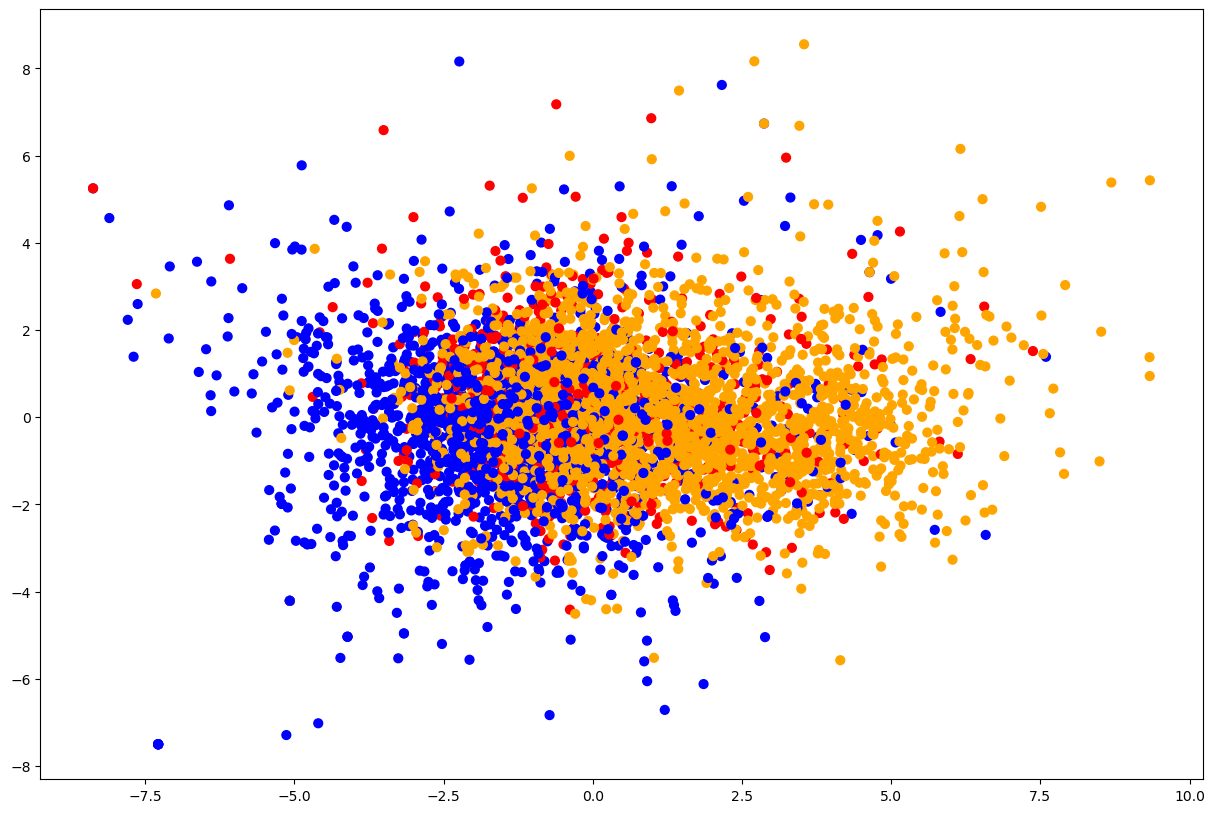

In [117]:
#setting up PCA
pca = PCA(2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({"Positive":"blue", 
                                 "Neutral":"red", 
                                 "Negative":"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(15,10))
plt.scatter(x_axis, y_axis, color=color_map, s=40)
plt.show()


## Topic Modeling

In [82]:
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

work 0.021155605
band 0.019690009
amazon 0.01355917
time 0.012833131
product 0.011718372


The words that are the most characteristic of the topics are indeed thematic. And each word group do conjure a distinct topic.

In [83]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 work, 0.02115560509264469
 band, 0.019690008834004402
 amazon, 0.013559170067310333
 time, 0.012833130545914173
 product, 0.011718371883034706

Topic 2:
 sleep, 0.022148150950670242
 track, 0.021426808089017868
 like, 0.01606997661292553
 app, 0.01588495261967182
 get, 0.011621098965406418

Topic 3:
 get, 0.018724126741290092
 sleep, 0.011541595682501793
 go, 0.011005590669810772
 point, 0.010830245912075043
 time, 0.010726400651037693

Topic 4:
 sleep, 0.017169708386063576
 device, 0.016645466908812523
 get, 0.012694056145846844
 tone, 0.011468368582427502
 time, 0.008846867829561234

Topic 5:
 sleep, 0.01795017346739769
 feature, 0.014886357821524143
 use, 0.014777974225580692
 battery, 0.013401731848716736
 like, 0.013184449635446072

Topic 6:
 halo, 0.020974861457943916
 sleep, 0.01773216389119625
 get, 0.012074783444404602
 use, 0.011509696952998638
 like, 0.011217025108635426

Topic 7:
 sleep, 0.02037731744349003
 body, 0.019781025126576424
 use, 0.01490163803100586
 t

In [84]:
import pyLDAvis.gensim_models

lda_idm = pyLDAvis.gensim_models.prepare(bow_lda, bow, vocabulary)

pyLDAvis.display(lda_idm)

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in fav

## Naive Bayes Classification

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

#model_df = model_df.drop(['Rating'],axis= 1)
X = model_df.iloc[:, :-2]
y = model_df.iloc[:, -1]

model_df.head()
X_train, X_test, y_train, y_test = train_test_split(df1["preprocessed"], df1["Rating_categorical"], test_size=0.5, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.preprocessed).toarray()
labels = df1.Rating_categorical
features.shape

(4960, 8057)

In [132]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [133]:
from sklearn.model_selection import cross_val_score
CV = 5
model = MultinomialNB()
cv_df = pd.DataFrame()
entries = []
model_name = model.__class__.__name__
accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [130]:
cv_df.groupby('model_name').accuracy.mean()

model_name
MultinomialNB    0.692137
Name: accuracy, dtype: float64

In [100]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.67      0.87      0.76       431
     Neutral       0.00      0.00      0.00       187
    Positive       0.68      0.79      0.74       374

    accuracy                           0.68       992
   macro avg       0.45      0.55      0.50       992
weighted avg       0.55      0.68      0.61       992



In [134]:

from sklearn.model_selection import cross_val_score
CV = 5
model = GaussianNB()
cv_df = pd.DataFrame()
entries = []
model_name = model.__class__.__name__
accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [135]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB    0.489315
Name: accuracy, dtype: float64

In [136]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
CV = 5
model = CategoricalNB()
cv_df = pd.DataFrame()
entries = []
model_name = model.__class__.__name__
accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
CategoricalNB    0.447581
Name: accuracy, dtype: float64

In [ ]:
ComplementNB

In [137]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
CV = 5
model = BernoulliNB()
cv_df = pd.DataFrame()
entries = []
model_name = model.__class__.__name__
accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
BernoulliNB    0.59879
Name: accuracy, dtype: float64

In [138]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
CV = 5
model = ComplementNB()
cv_df = pd.DataFrame()
entries = []
model_name = model.__class__.__name__
accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
ComplementNB    0.676815
Name: accuracy, dtype: float64

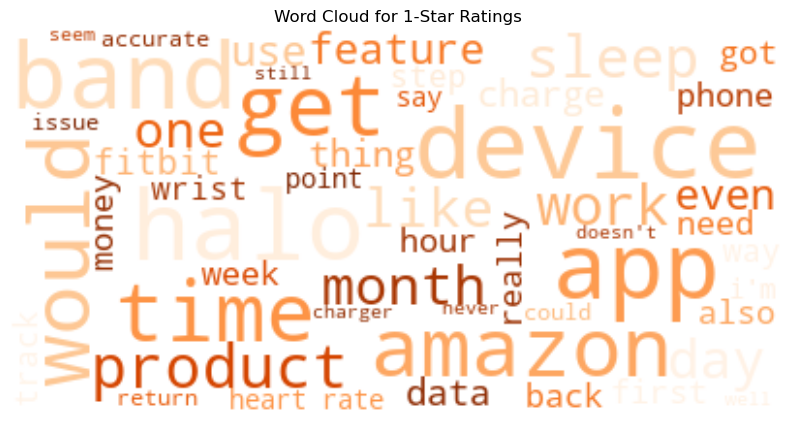

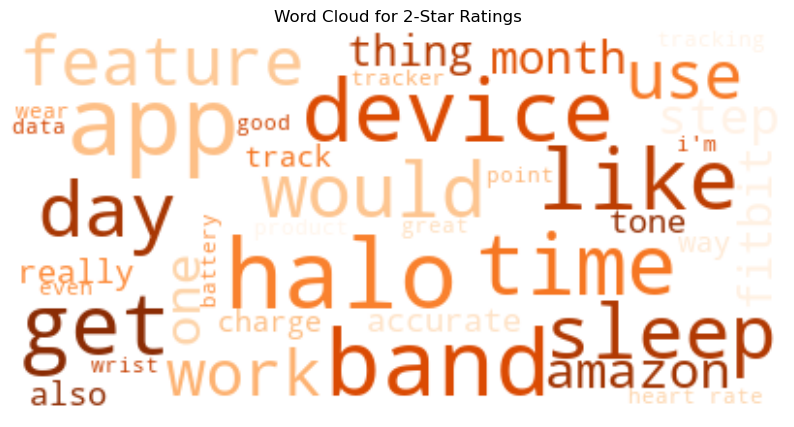

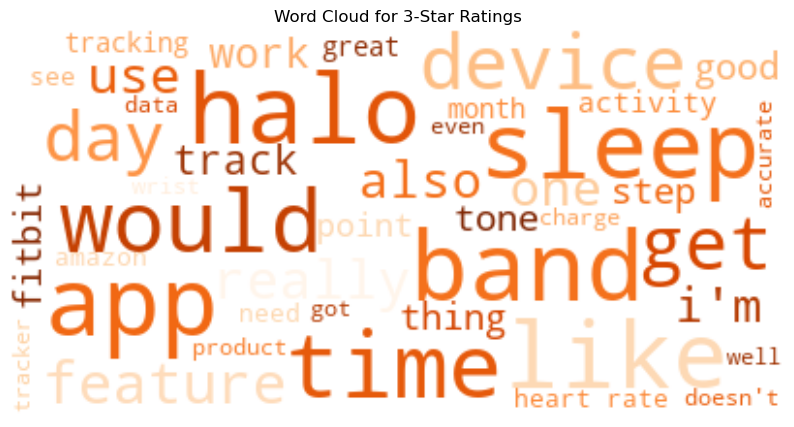

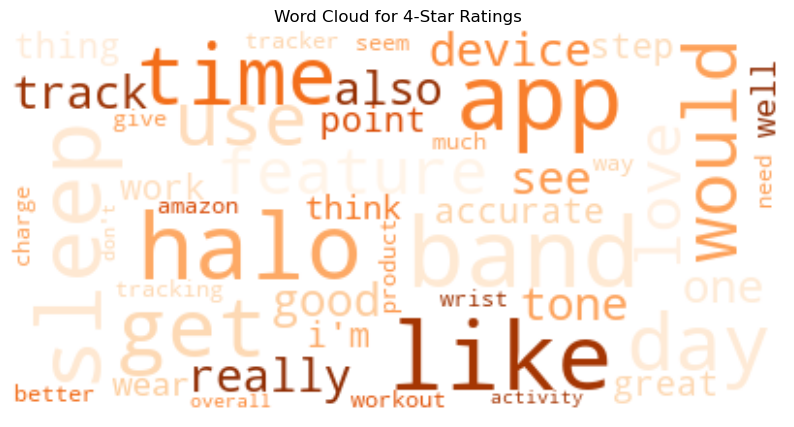

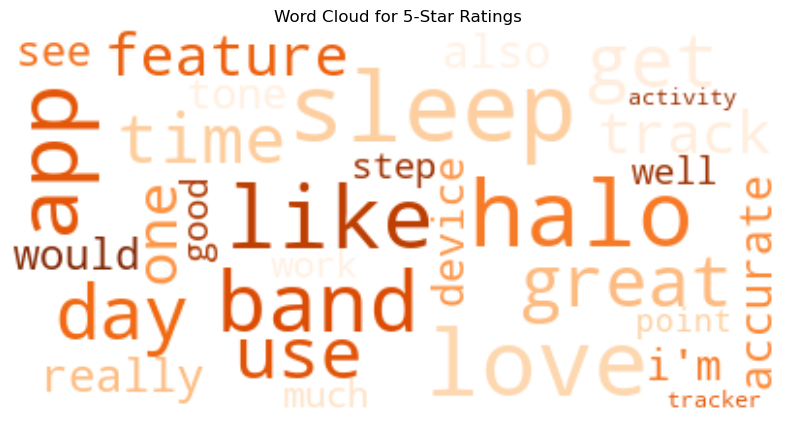

In [116]:
#Ignore Warnings
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10,max_font_size=50, max_words=50,background_color="white", colormap = "Oranges")

one_star_text = " ".join(df1[df1["Rating"]==1]["Review"].astype(str).values).lower()
two_star_text = " ".join(df1[df1["Rating"]==2]["Review"].astype(str).values).lower()
three_star_text = " ".join(df1[df1["Rating"]==3]["Review"].astype(str).values).lower()
four_star_text = " ".join(df1[df1["Rating"]==4]["Review"].astype(str).values).lower()
five_star_text = " ".join(df1[df1["Rating"]==5]["Review"].astype(str).values).lower()

text_list = [one_star_text,two_star_text,three_star_text,four_star_text, five_star_text]


for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()